# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import norm

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


___________________________________________________________________________________________________________________
## Question 1

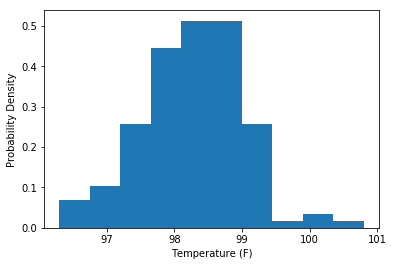

In [6]:
plt.hist(df['temperature'], density=True, bins=10)
plt.xlabel('Temperature (F)');
plt.ylabel('Probability Density');

In [7]:
print('mean={0} stdv={1}'.format(df['temperature'].mean(), df['temperature'].std()))

mean=98.24923076923078 stdv=0.7331831580389454


In [8]:
stat, p = shapiro(df['temperature'])
print('Statistics={0} p={1}'.format(stat, p))
# null hypothesis = the temperatures are normally distibuted
alpha = 0.05
if p > alpha:
	print('Fail to reject the null hypothesis (the temperatures are normally distributed)')
else:
	print('Reject the null hypothesis (the temperatures are not normally distributed)')

Statistics=0.9865770936012268 p=0.233174666762352
Fail to reject the null hypothesis (the temperatures are normally distributed)


In [9]:
stat, p = normaltest(df['temperature'])
print('Statistics={0} p={1}'.format(stat, p))
# null hypothesis = the temperatures are normally distibuted
alpha = 0.05
if p > alpha:
	print('Fail to reject the null hypothesis (the temperatures are normally distributed)')
else:
	print('Reject the null hypothesis (the temperatures are not normally distributed)')

Statistics=2.703801433319203 p=0.2587479863488254
Fail to reject the null hypothesis (the temperatures are normally distributed)


### Question: Is the distribution of body temperatures normal?
- By visualizing the data using a histogram it can be observed that the data trends towards a normal distibution.
- Using a Shapiro-Wilk Test to evaluate the normality of the temperature data also allows us to accept the null hypothesis and conclude that the data is normally distributed.
- Finally, the `normaltest` function was used from the scipy library to one more, prove that the null hypothesis can be accepted.

**Yes, the body temperatures appear to be normally distributed**
___________________________________________________________________________________________________________________
## Question 2

In [10]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [11]:
temperature = df.temperature
heart_rate = df.heart_rate
corr, r = pearsonr(temperature, heart_rate)
print('Correlation: {corr}, Pearson\'s R: {r}'.format(corr=corr, r=r))

Correlation: 0.2536564027207642, Pearson's R: 0.003591489250708233


### Question: Is the sample size large? Are the observations independent?
- There are 130 sample value in the dataset for temperature and heart rate. This is not a large sample size.
- According to Pearson's R coefficient the temerature and heart rate observations are not correlated. The R value is very close to 0.

**The sample size is small and the observations are independent**
___________________________________________________________________________________________________________________
## Question 3

***Null Hypothesis (H0):*** The true population mean is 98.6 degrees F

In [12]:
np.mean(df['temperature'])

98.24923076923078

### Graph Bootstrap Samples and ECDF of Data

In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [14]:
def draw_bs_samples(data, size=1):
    """Draw bootstrap samples"""
    for _ in range(size):
        # Generate bootstrap sample: bs_sample
        bs_sample = np.random.choice(data, size=len(data))
        # Compute and plot ECDF from bootstrap sample
        x, y = ecdf(bs_sample)
        _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)
        _ = plt.xlabel('Body Temperature (F)')
        _ = plt.ylabel('BS ECDF')

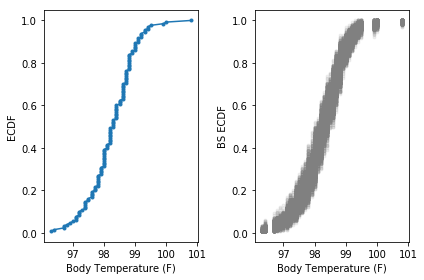

In [15]:
plt.subplot(1, 2, 1)

# Compute and plot ECDF from original data
x, y = ecdf(df['temperature'])
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('ECDF')

plt.subplot(1, 2, 2)

draw_bs_samples(df['temperature'], 500)

# Show the plots
plt.tight_layout()
plt.show()

In [16]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [17]:
def generate_bs_samples(data, func, size=1):
    """Generate bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

### T-Test

In [18]:
# Make an array of translated temperatures
translated_temperature = df['temperature'] - np.mean(df['temperature']) + 98.6

replicate_data = generate_bs_samples(translated_temperature, np.mean, 500)

# Compute fraction of replicates that are less than the observed tempertures
p_value = np.sum(replicate_data <= np.mean(df['temperature'])) / 500

print('P-value: {p_value}'.format(p_value=p_value))
if (p_value > 0.05):
    print('The true population mean is 98.6 degrees F. Fail to reject null hypothesis')
else:
    print('The true population mean is not 98.6 degrees F. Reject null hypothesis' )

P-value: 0.0
The true population mean is not 98.6 degrees F. Reject null hypothesis


### Z-Test

In [19]:
# Population standard deviation
pop_std = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print('Poplation standard deviation: {pop_std}'.format(pop_std=pop_std))

# Z-score with X as 98.6
z_score = (98.6 - np.mean(df['temperature'])) / pop_std
print('Z-score: {z_score}'.format(z_score=z_score))

# P-value with H0 = pop mean = 98.6 degrees F
p_value = norm.sf(abs(z_score))*2
print('P-value: {p_value}'.format(p_value=p_value))
if (p_value > 0.05):
    print('The true population mean is 98.6 degrees F. Fail to reject null hypothesis')
else:
    print('The true population mean is not 98.6 degrees F. Reject null hypothesis')

Poplation standard deviation: 0.06405661469519336
Z-score: 5.475925202078116
P-value: 4.3523151658821886e-08
The true population mean is not 98.6 degrees F. Reject null hypothesis


### Question: Is the true population mean really 98.6 degrees F?
- The first bootstrap hypothesis test failed to reject the null hypothesis getting an average temperature of 98.24 F. After using frequentist statistical testing and generating bootrap replicates of the data, the null hypothsis is rejected.
- Because we're comparing a dataset with a value, a permutation test is not applicable. Instead we shift the test data such that the mean matches the mean of the null hypothesis and run a t-test.
- Z-test was not done because the standard deviation of the true population is not known and the sample size is small.

**According to the t-test and z-test, no.**
___________________________________________________________________________________________________________________
## Question 4

In [20]:
sample_df = df.sample(n=10)
sample_df.head()

,temperature,gender,heart_rate
121,97.9,F,68.0
20,98.3,F,78.0
40,98.4,F,79.0
90,97.8,M,74.0
79,97.6,M,74.0


### T-Test of Sample of Data

In [21]:
# Make an array of translated temperatures
sample_translated_temperature = sample_df['temperature'] - np.mean(sample_df['temperature']) + 98.6

sample_replicate_data = generate_bs_samples(sample_translated_temperature, np.mean, 500)

# Compute fraction of replicates that are less than the observed tempertures
p_value = np.sum(sample_replicate_data <= np.mean(sample_df['temperature'])) / 500

print('P-value: {p_value}'.format(p_value=p_value))
if (p_value > 0.05):
    print('The true population mean is 98.6 degrees F. Fail to reject null hypothesis')
else:
    print('The true population mean is not 98.6 degrees F. Reject null hypothesis' )

P-value: 0.0
The true population mean is not 98.6 degrees F. Reject null hypothesis


### Z-Test of Sample Data

In [22]:
# Population standard deviation
sample_pop_std = np.std(sample_df['temperature']) / np.sqrt(len(sample_df['temperature']))
print('Poplation standard deviation: {pop_std}'.format(pop_std=sample_pop_std))

# Z-score with X as 98.6
z_score = (98.6 - np.mean(sample_df['temperature'])) / sample_pop_std
print('Z-score: {z_score}'.format(z_score=z_score))

# P-value with H0 = pop mean = 98.6 degrees F
p_value = norm.sf(abs(z_score))*2
print('P-value: {p_value}'.format(p_value=p_value))
if (p_value > 0.05):
    print('The true population mean is 98.6 degrees F. Fail to reject null hypothesis')
else:
    print('The true population mean is not 98.6 degrees F. Reject null hypothesis')

Poplation standard deviation: 0.20270668464557332
Z-score: 3.9959215031129798
P-value: 6.444308614335645e-05
The true population mean is not 98.6 degrees F. Reject null hypothesis


### Question: Draw a small sample of size 10 from the data and repeat both frequentist tests.
- Both tests give the same final result, rejecting the null hypothesis.
- The t-test, however, works better with smaller sample sizes.

**According to the t-test and z-test with a smaller sample size, we once again reject the null hypothesis.**
___________________________________________________________________________________________________________________
## Question 5

In [23]:
print(np.percentile(df['temperature'],[5,95]))

[97.045 99.3  ]


In [24]:
# +-2 std from the mean should give us the values that are considered above and below normal.
pop_std = np.std(sample_df['temperature']) / np.sqrt(len(sample_df['temperature']))
two_std = pop_std * 2
abnormal_limits = (np.mean(sample_df['temperature']) - two_std, np.mean(sample_df['temperature']) + two_std)
abnormal_limits

(97.38458663070885, 98.19541336929116)

### Question: At what temperature should we consider someone's temperature to be "abnormal"?
- 2 Std above or below the mean would be roughly above the 95th percentile and below the 5th percentile of the normal distribution of the data.

**The upper and lower bounds respectively are 98.21 F and 97.51 F**
___________________________________________________________________________________________________________________
## Question 6

***Null Hypothesis (H0):*** The male mean temperature and female mean temperature are the same.

In [27]:
male_mean = np.mean(df[df.gender == 'M']['temperature'])
female_mean = np.mean(df[df.gender == 'F']['temperature'])

print('Male mean temperature: {male_mean} F, Female mean temperature: {female_mean} F'.format(male_mean=male_mean, female_mean=female_mean))

Male mean temperature: 98.1046153846154 F, Female mean temperature: 98.39384615384613 F


In [37]:
male_data = df[df.gender == 'M']
female_data = df[df.gender == 'F']

mean_total = np.mean(df['temperature'])
empirical_diff_means = np.mean(male_data['temperature']) - np.mean(female_data['temperature'])

male_data_shifted = male_data['temperature'] - np.mean(male_data['temperature']) + mean_total
female_data_shifted = female_data['temperature'] - np.mean(female_data['temperature']) + mean_total

bs_replicates_m = generate_bs_samples(male_data_shifted, np.mean, size=1000)
bs_replicates_f = generate_bs_samples(female_data_shifted, np.mean, size=1000)

bs_replicates = bs_replicates_m - bs_replicates_f

p_value = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)

print('P-value: {p_value}'.format(p_value=p_value))
if (p_value > 0.05):
    print('The mean male and female temperatures are the same. Fail to reject null hypothesis')
else:
    print('The mean male and female temperatures are not the same. Reject null hypothesis' )

P-value: 0.991
The mean male and female temperatures are the same. Fail to reject null hypothesis


### Question: Is there a significant difference between males and females in normal temperature?
- Running a two-sample bootstrap hypothesis test for difference of means with 1000 bootstraped values tells us that the mean of males and females is the same.
- The distribution is different in the data but the data trends towards the same mean.

****
___________________________________________________________________________________________________________________